In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import currency_converter
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

In [2]:
book_df = pd.read_csv("../Project1/google_books_1299.csv").dropna()
book_df.drop_duplicates()
book_df.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"


In [3]:
#Standard Deviation for all data
book_df[["rating"]].std()

rating    0.39254
dtype: float64

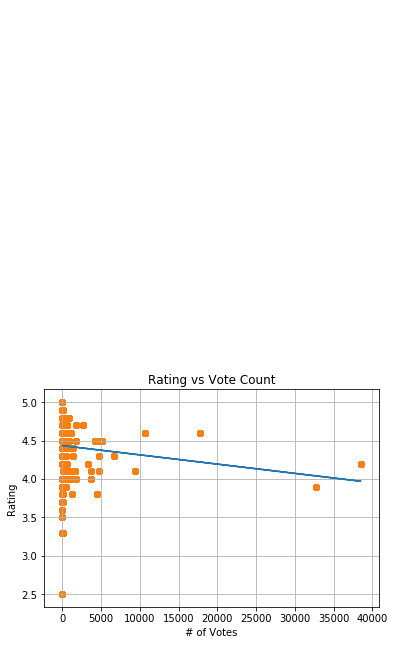

In [4]:
# Build a scatter plot votes vs rating
x_values = book_df["voters"].str.replace(",","").astype(float)
y_values = book_df["rating"]
plt.scatter(x_values, y_values, marker="o") 
# Incorporate the other graph properties
plt.title("Rating vs Vote Count")
plt.ylabel("Rating")
plt.xlabel("# of Votes")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("RatingVsVoteCount.png")

# Show plot
plt.show()

In [6]:
#Remove outliers for vote count
remove_vote_outliers = book_df.loc[book_df["voters"].str.replace(",","").astype(float)<5000]
remove_vote_outliers_df=pd.DataFrame(remove_vote_outliers)

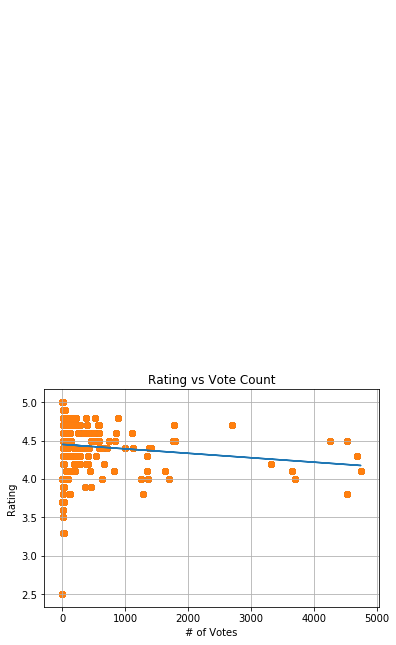

In [7]:
# Scatter Plot Votes Vs Rating Without Outliers
# Build a scatter plot votes vs rating
x_values = remove_vote_outliers_df["voters"].str.replace(",","").astype(float)
y_values = remove_vote_outliers_df["rating"]
plt.scatter(x_values, y_values, marker="o") 
# Incorporate the other graph properties
plt.title("Rating vs Vote Count")
plt.ylabel("Rating")
plt.xlabel("# of Votes")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("RatingVsVoteCount.png")

# Show plot
plt.show()

In [8]:
# Create the bins in which Data will be held  
bins = [0, 50, 500, 5000, 50000]

# Create the names for the five bins
bin_names = ["0-49", "50-500", "500-5,000", "5,000-50,000"]

In [9]:
# Slice the data and place it into bins
pd.cut(book_df["voters"].str.replace(",","").astype(float), bins, labels=bin_names).head()

0       50-500
1         0-49
2         0-49
3         0-49
4    500-5,000
Name: voters, dtype: category
Categories (4, object): [0-49 < 50-500 < 500-5,000 < 5,000-50,000]

In [10]:
book_df["Rating Count Bin"] = pd.cut(book_df["voters"].str.replace(",","").astype(float), bins, labels=bin_names, include_lowest=True)
book_df
# Creating a group based off of the bins
binned_df = book_df.groupby("voters")
binned_df.max()

,Unnamed: 0,title,author,rating,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Rating Count Bin
voters,,,,,,,,,,,,,,
1,1275,Working With You is Killing Me: Freeing Yourse...,Thomas Ittelson,5.0,98.42,SAR,“One of the greatest writers of the twentieth ...,Simon and Schuster,448,none,"Flowing text, Google-generated PDF",English,"Oct 15, 2019",0-49
"1,105",1000,The Lord of the Rings: The Fellowship of the R...,J. R. R. Tolkien,4.6,81.87,SAR,All three parts of the epic masterpiece The Lo...,HarperCollins UK,1216,none,9780007322596,English,"Apr 20, 2009","500-5,000"
"1,130",1205,I Am Pilgrim: The bestselling Richard & Judy B...,Terry Hayes,4.4,49.92,SAR,'An all too plausible disaster for the world w...,Random House,704,none,9781448170609,English,"Jul 18, 2013","500-5,000"
"1,251",948,Little Girl Lost: A Lucy Black Thriller,Brian McGilloway,4.0,35.44,SAR,This New York Times bestseller is perfect for ...,Harper Collins,336,none,9780062336583,English,"Feb 18, 2014","500-5,000"
"1,285",640,Mega Man #1,Ian Flynn,3.8,11.78,SAR,The future looks bright when brilliant and ben...,Archie Comic Publications,25,none,9781619882171,English,"May 4, 2011","500-5,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1228,The Jump,Doug Johnstone,4.1,32.78,SAR,Struggling to come to terms with the suicide o...,Faber & Faber,304,none,9780571321599,English,"Aug 4, 2015",50-500
94,965,God of War: The Official Novelization,J.M. Barlog,4.5,15.82,SAR,The novelization of the highly anticipated God...,Titan Books,400,none,9781789090154,English,"Aug 28, 2018",50-500
95,1188,Kings and Sorcerers Bundle (Books 2 and 3),Morgan Rice,4.5,33.72,SAR,“An action packed fantasy sure to please fans ...,Morgan Rice,500,none,9781632915740,English,"Feb 25, 2016",50-500


In [11]:
# Create a GroupBy object based upon "View Group"
book_group = book_df.groupby("Rating Count Bin")

# Find how many rows fall into each bin
print(book_group["Rating Count Bin"].count())

# Get the average of each column within the GroupBy object
rating_mean=book_group[["rating"]].mean()
rating_mean

Rating Count Bin
0-49            522
50-500          435
500-5,000       231
5,000-50,000     33
Name: Rating Count Bin, dtype: int64


,rating
Rating Count Bin,
0-49,4.446360
50-500,4.432184
"500-5,000",4.376190
"5,000-50,000",4.296970


In [12]:
#Standard Deviation per bin
book_group[["rating"]].std()

,rating
Rating Count Bin,
0-49,0.520036
50-500,0.258716
"500-5,000",0.250903
"5,000-50,000",0.262779
